In [11]:
%load_ext autoreload
%autoreload 2


In [12]:
import torch
import torch.nn
from PIL import Image
from strhub.data.module import SceneTextDataModule

In [13]:
# Load model and image transforms
parseq = torch.hub.load('baudm/parseq', 'parseq', pretrained=True).eval()
img_transform = SceneTextDataModule.get_transform(parseq.hparams.img_size)

Using cache found in /home/ubuntu/.cache/torch/hub/baudm_parseq_main


In [14]:
from adet.evaluation.rrc_evaluation_funcs_ic15 import load_zip_file, decode_utf8, get_tl_line_values_from_file_contents
from adet.evaluation.text_eval_script_ic15 import default_evaluation_params
from adet.evaluation import TextEvaluator
from adet.data.builtin import register_all_coco
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--config_file', default='configs/ViTAEv2_S/IC15/gt_bezier_parseq.yaml')
args = parser.parse_args([])

In [15]:
from adet.config import get_cfg
def setup_cfg(args):
    # load config from file and command-line arguments
    cfg = get_cfg()
    cfg.merge_from_file(args.config_file)
    # cfg.merge_from_list(args.opts)
    # Set score_threshold for builtin models
    # cfg.MODEL.RETINANET.SCORE_THRESH_TEST = args.confidence_threshold
    # cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = args.confidence_threshold
    # cfg.MODEL.FCOS.INFERENCE_TH_TEST = args.confidence_threshold
    # cfg.MODEL.MEInst.INFERENCE_TH_TEST = args.confidence_threshold
    # cfg.MODEL.PANOPTIC_FPN.COMBINE.INSTANCES_CONFIDENCE_THRESH = args.confidence_threshold
    cfg.freeze()
    return cfg

In [16]:
cfg = setup_cfg(args)
evaluationParams = default_evaluation_params()
register_all_coco(voc_size_cfg=cfg.MODEL.TRANSFORMER.VOC_SIZE, num_pts_cfg=cfg.MODEL.TRANSFORMER.NUM_POINTS)
evaluator = TextEvaluator(dataset_name = cfg.DATASETS.TEST[0], cfg = cfg, distributed=False)

In [17]:
img_id = '2'
img_path = f'datasets/ic15/test_images/img_{img_id}.jpg'
evaluator._text_eval_gt_path
gt = load_zip_file(evaluator._text_eval_gt_path, evaluationParams['GT_SAMPLE_NAME_2_ID'])
gtFile = decode_utf8(gt[img_id])

In [18]:
pointsList,_,transcriptionsList = get_tl_line_values_from_file_contents(gtFile,evaluationParams['CRLF'],evaluationParams['LTRB'],True,False)

In [19]:
evaluationParams['LTRB']

False

In [22]:
# pts = pointsList[0]
img_id = '2'
img_path = f'datasets/ic15/test_images/img_{img_id}.jpg'
pts= [518,
  301,
  531,
  301,
  544,
  302,
  557,
  303,
  555,
  322,
  541,
  321,
  528,
  320,
  515,
  320]
import numpy as np
# pts = np.array(pts)[[1, 0, 3, 2, 5, 4, 7, 6, 15, 14, 13, 12, 11, 10, 9, 8]]
points = list(zip(pts[0::2], pts[1::2]))
# x_offset = 59
# y_offset = 55
# points = [(p_[0] + x_offset, p_[1] - y_offset) for p_ in points]

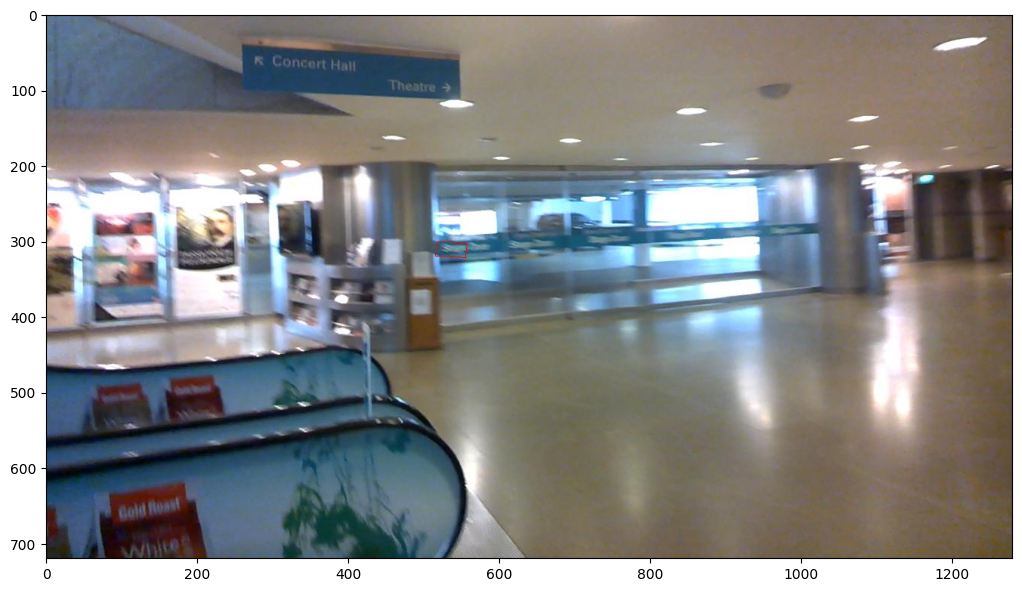

In [23]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
img_pil =Image.open(img_path)
draw = ImageDraw.Draw(img_pil)
draw.polygon(points, outline="red")
w, h = img_pil.size
dpi = 100
fig_width = w / dpi
fig_height = h / dpi
plt.figure(figsize=(fig_width, fig_height), dpi=dpi)

# Show the image using Matplotlib
plt.imshow(img_pil)
# plt.axis('off') # Optional, to hide the axis
plt.show()
